# DeedTree Inference Notebook

In [1]:
from deadtrees.network.segmodel import SemSegment
from deadtrees.data.deadtreedata import DeadtreesDataModule, inv_normalize, DeadtreeDatasetConfig

from deadtrees.visualization.helper import show

import hydra
from omegaconf import DictConfig, OmegaConf

import torch
import numpy as np

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load a model from checkpoint

> **TODOs:**   
> - add a model to dvc under `./checkpoints/`
> - automate the registration (and dvc add) of current *default* model

In [3]:
MODEL_CHECKPOINT_PATH = "../checkpoints/bestmodel.ckpt"

In [4]:
# load model and set to eval
model = SemSegment.load_from_checkpoint(MODEL_CHECKPOINT_PATH)
model.eval();

## Initialize Lightning DataModule 

... use the generic conf constructor from hydra for now.

> **TODO:**  
> - make this simpler 
> - work with source test tile (8kx8k)

In [5]:
conf = OmegaConf.load('../conf/datamodule/deadtrees_multi_datasets_singleclass_rgbn.yaml')
# modify test loader to run single samples
conf.datamodule.test_dataloader_conf.batch_size = 1
conf.datamodule.test_dataloader_conf.num_workers = 0

datamodule  = hydra.utils.instantiate(
    conf.datamodule,
    data_dir="../data/dataset/train",
    pattern="train-balanced-*.tar",
)
datamodule.setup()

Shard size: 131 (estimate base on file: ../data/dataset/train/train-balanced-000000.tar)
No test shards specified
No test shards specified


# Check the model on the first 3 images if this testset shard

| Symbol      | Description            |
| :-----------|:---------------------- |
| **X**       | Input                  | 
| **X_mask**  | Input (incl. mask/ GT) |
| **y**       | Groundtruth            |
| **ŷ**       | Model prediction       |

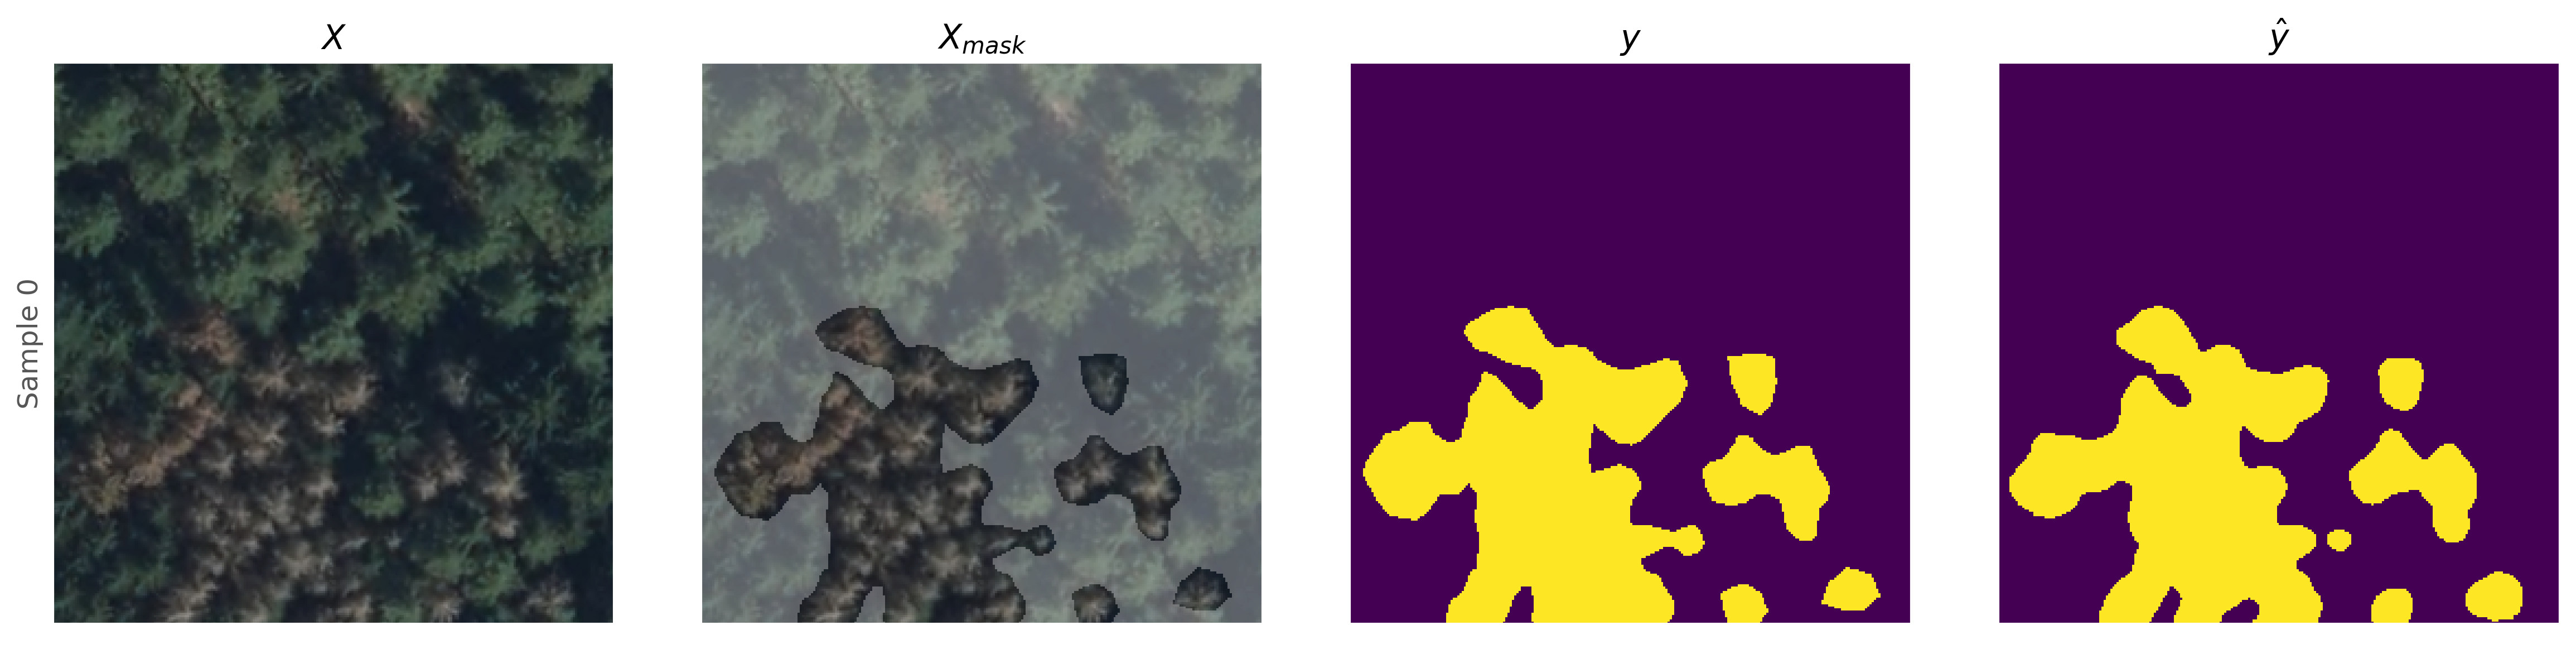

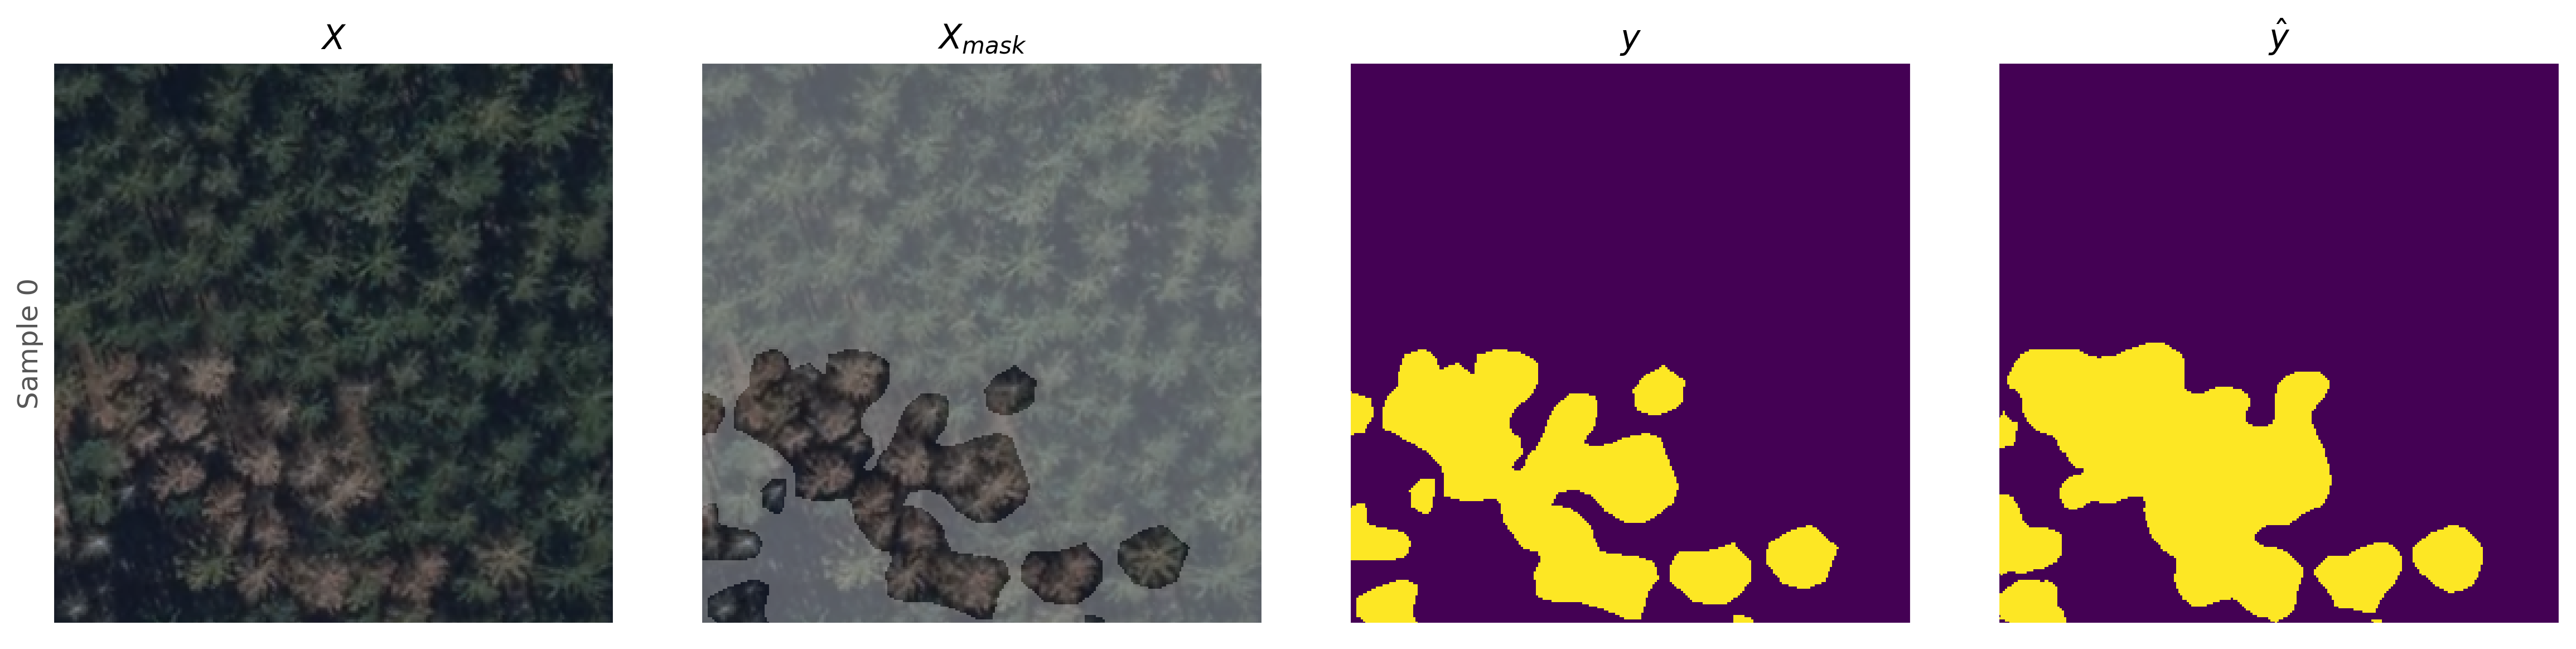

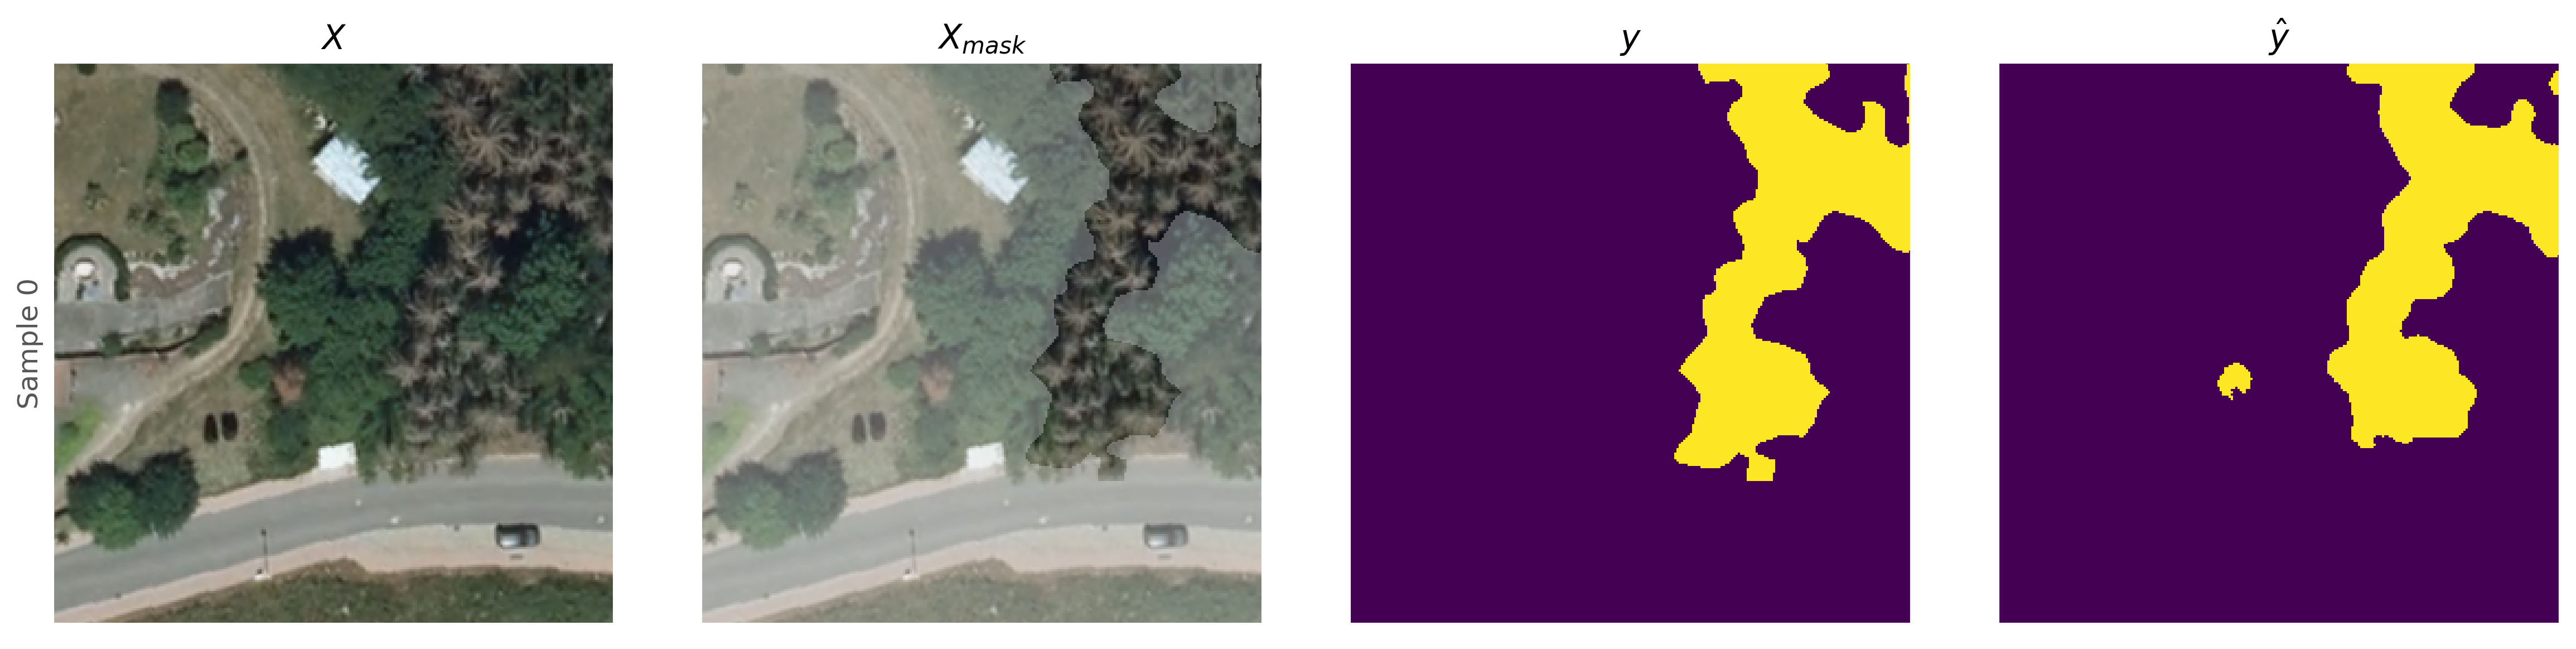

In [7]:
for cnt, (x, y, stats) in enumerate(datamodule.test_dataloader()):
    if cnt == 3:
        break
    # TODO: make this nicer...
    y_hat = model.model(x)
    show(x=x, y=y, y_hat=y_hat, dpi=300, display=True)